In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
data = torch.tensor([[-1.493,  0.048],
       [-1.25 ,  0.459],
       [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]])

Step 0, loss 0.022890962660312653


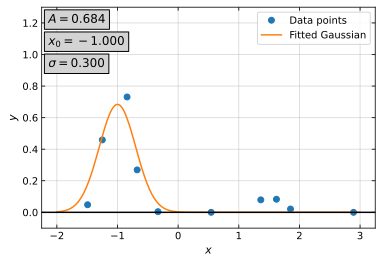

In [3]:
class Gaussian(torch.nn.Module):
    def __init__(self, A=1, x0=1, sigma=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))
    
    def forward(self, x):
        return self.A * torch.exp(-0.5*(x-self.x0)**2/self.sigma**2)

# Fit the Gaussian to the data, assuming x0=-1 and sigma=0.3.
g = Gaussian(x0=-1, sigma=0.3)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam([g.A], lr=0.01)

steps = 1000
for step in range(steps):
    optimizer.zero_grad()
    loss = loss_func(g.forward(data[:,0]), data[:,1])
    loss.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(f'Step {step}, loss {loss.item()}')

# Plot the data points and the fitted Gaussian.
xs = torch.linspace(-2, 3, 250)
fig, ax = plt.subplots(figsize=(6, 4))
with torch.no_grad():
    ax.plot(data[:,0], data[:,1], 'o', label='Data points')
    ax.plot(xs, g.forward(xs), label='Fitted Gaussian')
ax.text(0.02, 0.97, fr'$A = {g.A.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.87, fr'$x_0 = {g.x0.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.77, fr'$\sigma = {g.sigma.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.set(xlabel='$x$', ylabel='$y$', ylim=(-0.1, 1.3))
ax.axhline(0, c='k')
ax.grid(alpha=0.5)
ax.legend()

fig.savefig('ex45_fig1.png')

Step 0, loss 0.24289950728416443


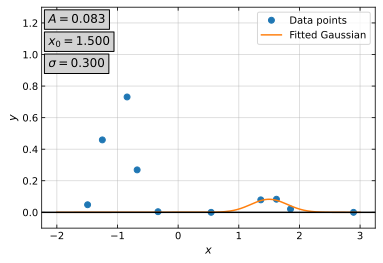

In [4]:
# Assume x0=1.5 and sigma=0.5, and fit A again.
g = Gaussian(x0=1.5, sigma=0.3)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam([g.A], lr=0.01)

steps = 1000
for step in range(steps):
    optimizer.zero_grad()
    loss = loss_func(g.forward(data[:,0]), data[:,1])
    loss.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(f'Step {step}, loss {loss.item()}')

# Plot the data points and the fitted Gaussian.
xs = torch.linspace(-2, 3, 250)
fig, ax = plt.subplots(figsize=(6, 4))
with torch.no_grad():
    ax.plot(data[:,0], data[:,1], 'o', label='Data points')
    ax.plot(xs, g.forward(xs), label='Fitted Gaussian')
ax.text(0.02, 0.97, fr'$A = {g.A.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.87, fr'$x_0 = {g.x0.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.77, fr'$\sigma = {g.sigma.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.set(xlabel='$x$', ylabel='$y$', ylim=(-0.1, 1.3))
ax.axhline(0, c='k')
ax.grid(alpha=0.5)
ax.legend()

fig.savefig('ex45_fig2.png')

Step 0, loss 0.3190150260925293


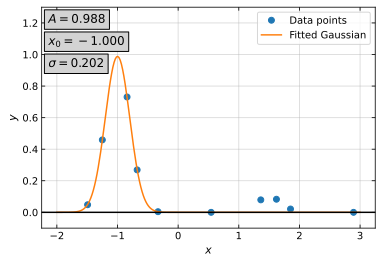

In [5]:
# Full fit
g = Gaussian()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(g.parameters(), lr=0.01)

steps = 1000
for step in range(steps):
    optimizer.zero_grad()
    loss = loss_func(g.forward(data[:,0]), data[:,1])
    loss.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(f'Step {step}, loss {loss.item()}')

# Plot the data points and the fitted Gaussian.
xs = torch.linspace(-2, 3, 250)
fig, ax = plt.subplots(figsize=(6, 4))
with torch.no_grad():
    ax.plot(data[:,0], data[:,1], 'o', label='Data points')
    ax.plot(xs, g.forward(xs), label='Fitted Gaussian')
ax.text(0.02, 0.97, fr'$A = {g.A.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.87, fr'$x_0 = {g.x0.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.text(0.02, 0.77, fr'$\sigma = {g.sigma.item():.3f}$', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='lightgrey'))
ax.set(xlabel='$x$', ylabel='$y$', ylim=(-0.1, 1.3))
ax.axhline(0, c='k')
ax.grid(alpha=0.5)
ax.legend()

fig.savefig('ex45_fig3.png')